In [1]:
import os
from datagenerator import DataGenerator
import pickle
import random
import utils
from keras import models
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
print("Loading models...")

model_name_voxnet = utils.get_latest_model("voxnet")
model_name_voxnet = "20180804-0930-voxnet-model.h5"
print(model_name_voxnet)
model_voxnet = models.load_model(model_name_voxnet)
model_voxnet.summary()
print("")

model_name_pointnet = utils.get_latest_model("pointnet")
print(model_name_pointnet)
model_pointnet = models.load_model(model_name_pointnet)
model_pointnet.summary()
print("")

print("Done.")

Loading models...
20180804-0930-voxnet-model.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 32, 32, 32, 1)     0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 14, 14, 14, 32)    4032      
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 12, 12, 12, 32)    27680     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 6, 6, 6, 32)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6912)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               884864    
_________________________________________________________________
dense_2 (Dense)             

In [3]:
print("Loading datasets...")

dataset_name_voxelgrid = utils.get_latest_preprocessed_dataset("voxelgrid-dataset")
print(dataset_name_voxelgrid)

dataset_name_pointcloud = utils.get_latest_preprocessed_dataset("pointcloud-dataset")
print(dataset_name_pointcloud)

print("Done.")

Loading datasets...
20180807-1109-voxelgrid-dataset.p
20180807-1057-pointcloud-dataset.p
Done.


In [4]:
dataset_name = dataset_name_voxelgrid
(x_input_train, y_output_train, paths_train), (x_input_test, y_output_test, paths_test), dataset_parameters = pickle.load(open(dataset_name, "rb"))
model = model_voxnet

In [5]:
print("Sampling...")

number_of_samples = 100
samples_indices = np.random.choice(range(x_input_test.shape[0]), number_of_samples)

losses = [] 
metrics = []
for index in samples_indices:
    
    x_input_random = x_input_test[index:index + 1]
    y_output_random = y_output_test[index:index + 1]
    loss, metric = model.evaluate(x_input_random, y_output_random, verbose=0)
    losses.append(loss)
    metrics.append(metric)
    
losses = np.array(losses)
metrics = np.array(metrics)

print("Done.")

Sampling...
Done.


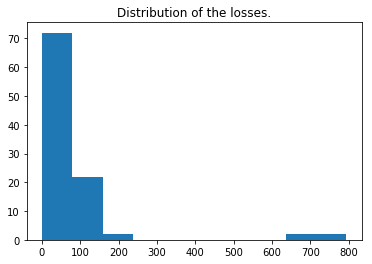

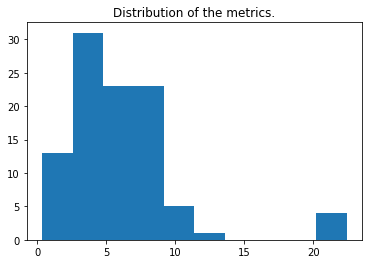

In [6]:
# Plot the distribution of losses and metrics.    
plt.hist(losses)
plt.title("Distribution of the losses.")
plt.show()
plt.close()

plt.hist(metrics)
plt.title("Distribution of the metrics.")
plt.show()
plt.close()

Best : [0.3398509  0.73465967 1.01723814 1.0570116  1.14260197 1.30829859
 1.53785944 1.66271782 2.059201   2.15371943]
Worst: [ 9.32595634  9.46572018 10.10579681 10.53320694 11.11038113 11.50891781
 20.46944046 20.65017509 21.61103439 22.42821121]
Analyzing best...


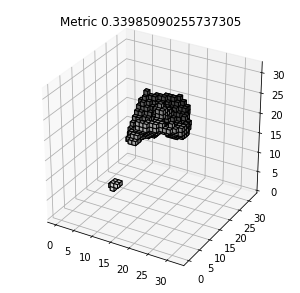

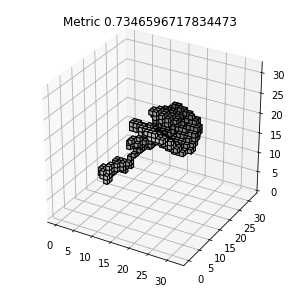

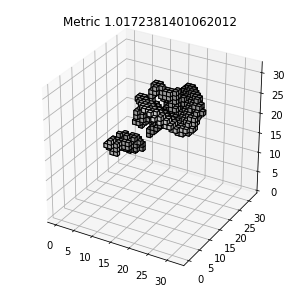

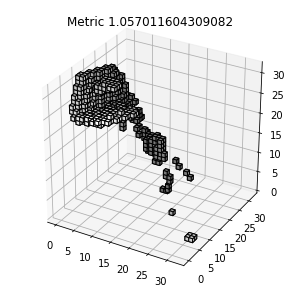

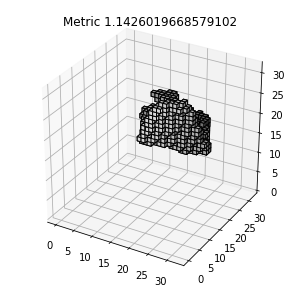

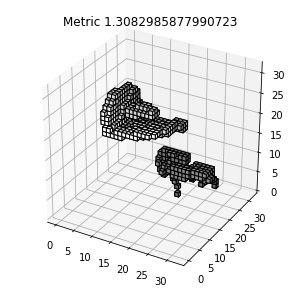

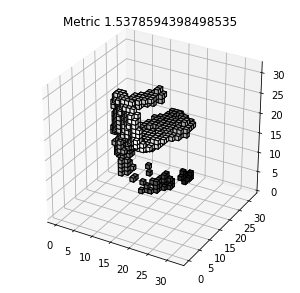

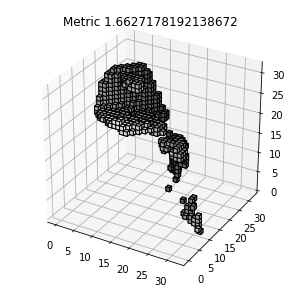

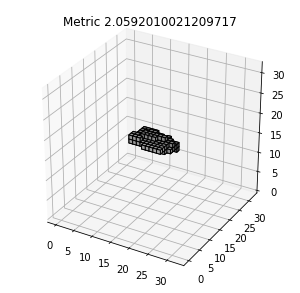

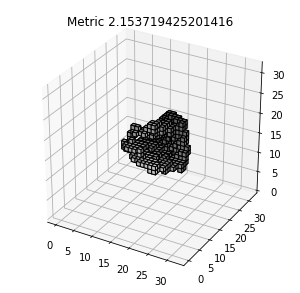


Analyzing worst...


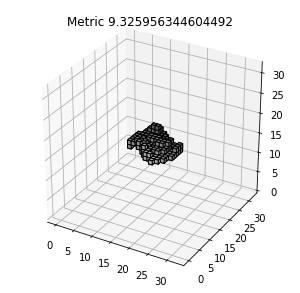

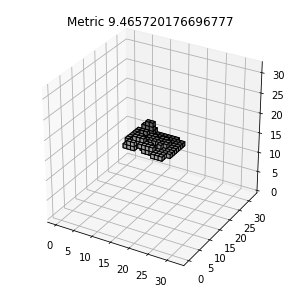

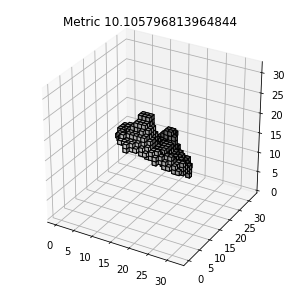

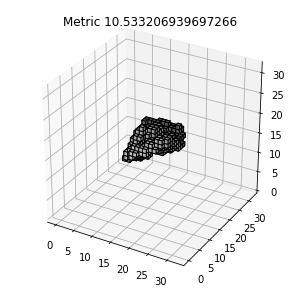

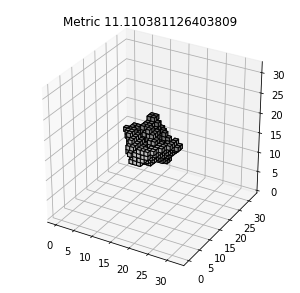

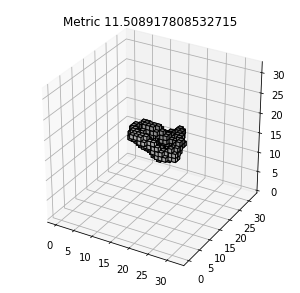

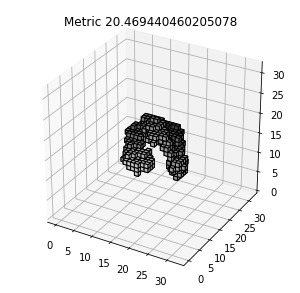

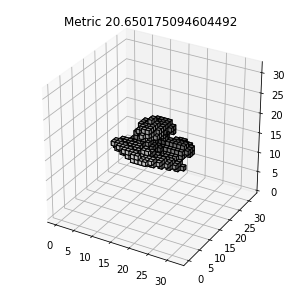

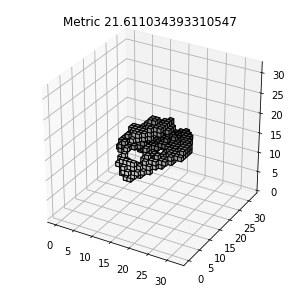

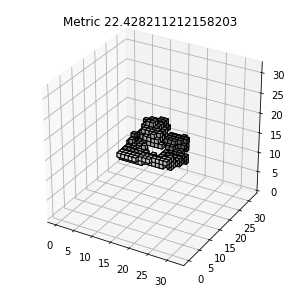


Done.


In [7]:
argsort = np.argsort(metrics)

indices_best = argsort[0:10]
indices_worst = argsort[-10:]

print("Best :", metrics[indices_best])
print("Worst:", metrics[indices_worst])

def analyze_samples(indices_metrics):
    # Indices are indices in the argsort. Get the indices of the samples.
    indices_samples = [samples_indices[index] for index in indices_metrics]

    for index_metrics, index_samples in zip(indices_metrics, indices_samples):
        title = "Metric {}".format(metrics[index_metrics])
        utils.render_voxelgrid(x_input_test[index_samples], title=title)
    

print("Analyzing best...")
analyze_samples(indices_best)
print("")

print("Analyzing worst...")
analyze_samples(indices_worst)
print("")

print("Done.")

In [8]:
Xload net
load some data
do predictions
Xsort predicitons by loss
visualize

SyntaxError: invalid syntax (<ipython-input-8-0d67c822b686>, line 1)